### トーンカーブによる画像変換
- 以下に示すような，画素値の対応表でる```LUT（ルックアップテーブル）```を構築する

| 入力画像（変換前）の画素値 | 補正画像（変換後）の画素値 |
| ---- | ---- |
| 0 | 255 |
| 1 | 254 |
| 2 | 253 |
| 3 | 252 |
| 4 | 251 |
| ･･･ | ･･･ |
| 255 | 0 |

### 明度調整
- 明度調整には入力画像の画素値が1違うと，補正前の画素値がどれだけ増えるかの傾き$a$と，補正後の最低の画素値$b$を設定することで，以下のように書くことができる．
- ただし，画素値が0から255の整数のため，この範囲を超えないように，```np.clip()```を使用する
    - ```np.clip(画素値変数, 最小値，最大値)```とかくことで，最小値より小さい値を最小値にし，最大値より大きい値を最大値にする

```python
import numpy as np
a = 1
b = 100
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value * a + b 
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)
```

In [1]:
import numpy as np
a = 1
b = 100
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value * a + b 
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)
print(after_pixel_value)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

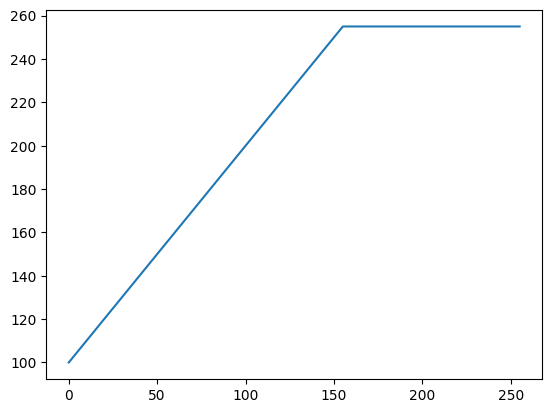

In [2]:
# matplotlibでプロットする
import matplotlib.pyplot as plt

a = 1
b = 100
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value * a + b 
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)

plt.plot(after_pixel_value)
plt.show()

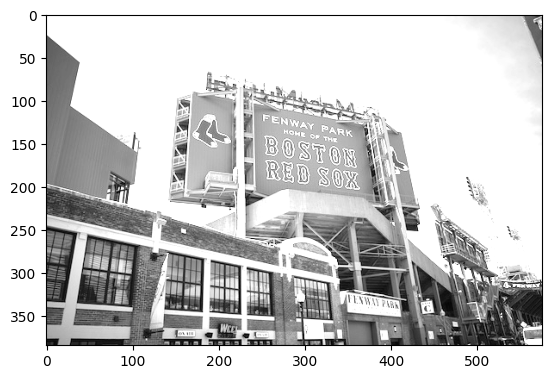

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
a = 1
b = 100
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value * a + b 
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)


# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

### コントラスト低減
-  $a$以上$b$を指定し，画素値を$a$以上$b$以下で直線（1次関数）の関係で収まるように変換する
1. $a$と$b$の値を設定する（$a < b$）
2. 以下の式で，画素値を変更する（この操作で$a$から$b$が求まる）
```
after_pixel_value = a + before_pixel_value / 255 * (b - a)
after_pixel_value = after_pixel_value.astype(np.uint8)
```

In [4]:
import numpy as np
a = 100
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = a + before_pixel_value / 255 * (b - a)
after_pixel_value = after_pixel_value.astype(np.uint8)
print(after_pixel_value)

[100 100 100 101 101 101 102 102 103 103 103 104 104 105 105 105 106 106
 107 107 107 108 108 109 109 109 110 110 110 111 111 112 112 112 113 113
 114 114 114 115 115 116 116 116 117 117 118 118 118 119 119 120 120 120
 121 121 121 122 122 123 123 123 124 124 125 125 125 126 126 127 127 127
 128 128 129 129 129 130 130 130 131 131 132 132 132 133 133 134 134 134
 135 135 136 136 136 137 137 138 138 138 139 139 140 140 140 141 141 141
 142 142 143 143 143 144 144 145 145 145 146 146 147 147 147 148 148 149
 149 149 150 150 150 151 151 152 152 152 153 153 154 154 154 155 155 156
 156 156 157 157 158 158 158 159 159 160 160 160 161 161 161 162 162 163
 163 163 164 164 165 165 165 166 166 167 167 167 168 168 169 169 169 170
 170 170 171 171 172 172 172 173 173 174 174 174 175 175 176 176 176 177
 177 178 178 178 179 179 180 180 180 181 181 181 182 182 183 183 183 184
 184 185 185 185 186 186 187 187 187 188 188 189 189 189 190 190 190 191
 191 192 192 192 193 193 194 194 194 195 195 196 19

### 範囲指定の描画
以下の記述を書くことで，範囲指定プロットができる
- ```plt.xlim(a,b)```: x軸の範囲を$a$以上$b$以下にする
- ```plt.ylim(a,b)```: y軸の範囲を$a$以上$b$以下にする

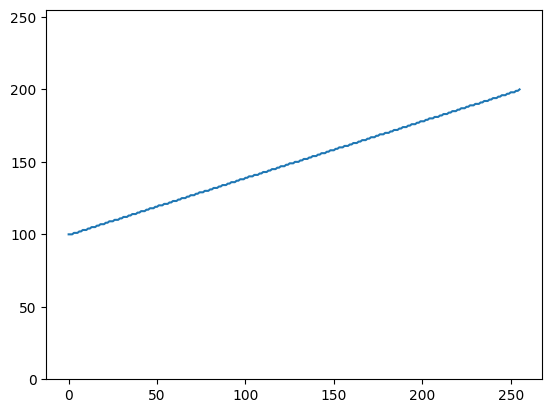

In [5]:
# matplotlibでプロットする
import matplotlib.pyplot as plt

a = 100
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = a + before_pixel_value / 255 * (b - a)
after_pixel_value = after_pixel_value.astype(np.uint8)

plt.plot(after_pixel_value)
plt.ylim(0, 255) # y軸を0から255でプロットする
plt.show()

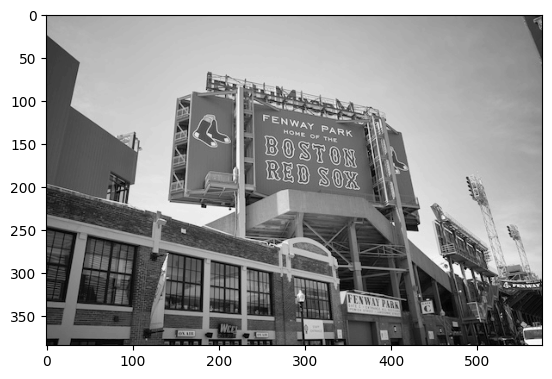

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
a = 100
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = a + before_pixel_value / 255 * (b - a)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

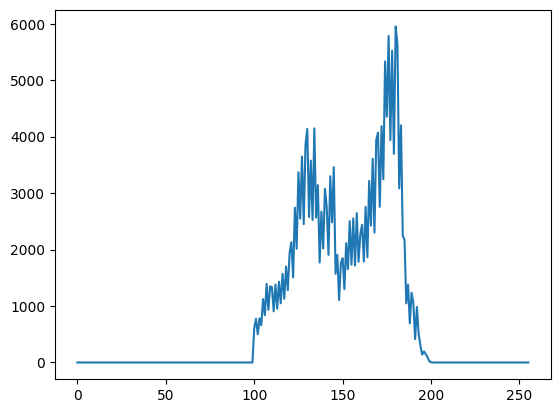

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
a = 100
b = 200
before_pixel_value = np.arange(256)
after_pixel_value = a + before_pixel_value / 255 * (b - a)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# ヒストグラム作成
hist = cv2.calcHist([after_image], [0], None, [256], [0,256])

# グラフ表示
plt.plot(hist)
plt.show()

### ソラリゼーション（応用事例）
- 三角関数を使用する
    - スライドの例の場合，
        ```変換後の画素値 = A sin(4π(変換前の画素値/255 + 3/8)) + A```
    - ただし，```A = 255 / 2```となる
- numpyライブラリをimportしている場合
    - $\sin$ は，```np.sin()``` を使用して表現できる
    - $\pi$ は，```np.pi``` を使用して表現できる

- まとめると
```python
A = 255/2
before_pixel_value = np.arange(256)
after_pixel_value = A * np.sin(4 * np.pi * (before_pixel_value/255 + 3/8)) + A
after_pixel_value = after_pixel_value.astype(np.uint8)
```

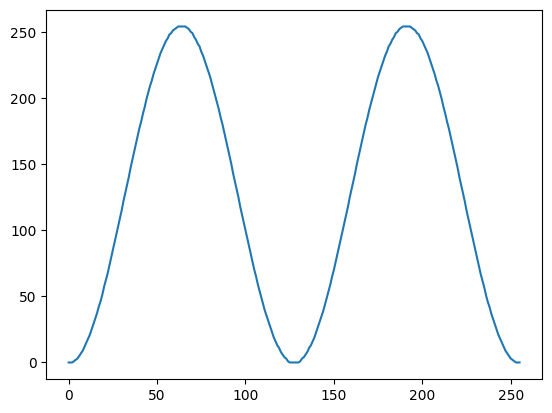

In [8]:
import numpy as np
import matplotlib.pyplot as plt

A = 255/2
before_pixel_value = np.arange(256)
after_pixel_value = A * np.sin(4 * np.pi * (before_pixel_value/255 + 3/8)) + A
after_pixel_value = after_pixel_value.astype(np.uint8)
plt.plot(after_pixel_value)
plt.show()

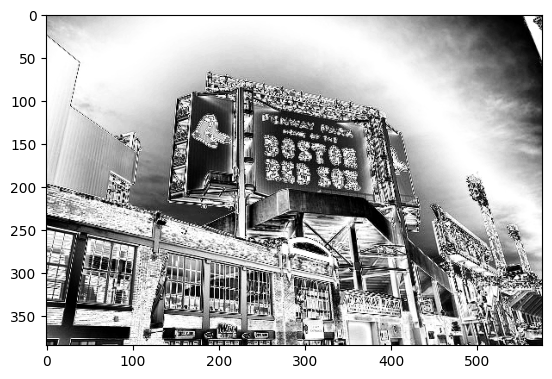

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR → グレー

# ルックアップテーブルを作成する
A = 255/2
before_pixel_value = np.arange(256)
after_pixel_value = A * np.sin(4 * np.pi * (before_pixel_value/255 + 3/8)) + A
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う
after_image = cv2.LUT(image, after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.gray()
plt.show()

### トーンカーブによるカラー画像の補正
- 一旦，画素値をコピーする
    - 画像をRGBで読み込んだ後に，```after_image = image.copy()``` を行う
- 基本的には，LUT（ルックアップテーブル）を作成する部分は変わらない
- **ただし，```cv2.LUT()```をRGBのそれぞれの画素値を適用する**
- プログラムは以下のようになる（RGBそれぞれ書くこと）
```python
補正画像変数[:, :, 0] = cv2.LUT(入力画像変数[:, :, 0], 変更後のピクセル画素値変数) # Rに対応する適用
補正画像変数[:, :, 1] = cv2.LUT(入力画像変数[:, :, 1], 変更後のピクセル画素値変数) # Gに対応する適用
補正画像変数[:, :, 2] = cv2.LUT(入力画像変数[:, :, 2], 変更後のピクセル画素値変数) # Bに対応する適用
```
- トーンカーブで変更したい場合は，変更後のピクセル画素値変数を適用する 
- トーンカーブで変更したくない場合は，変更前のピクセル画素値変数を適用する

- RGB形式で画素値が保存されている場合
    - ```[:, :, 0]```: Rの画素値
    - ```[:, :, 1]```: Gの画素値
    - ```[:, :, 2]```: Bの画素値
- BGR形式で画素値が保存されている場合
    - ```[:, :, 0]```: Bの画素値
    - ```[:, :, 1]```: Gの画素値
    - ```[:, :, 2]```: Rの画素値

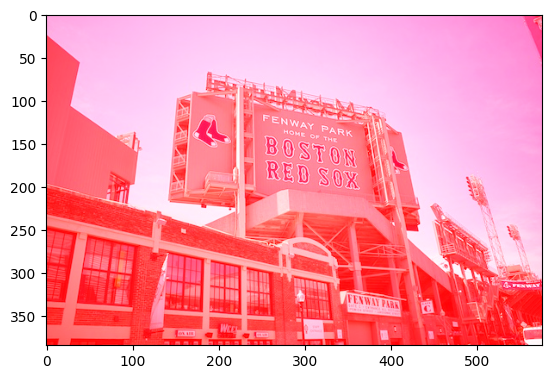

In [11]:
# サンプルプログラム
# 赤の画素値だけ255にする
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
before_pixel_value = np.arange(256)
# 画素値を+255する
after_pixel_value = before_pixel_value + 255
# 画素値を0から255にする
after_pixel_value = np.clip(after_pixel_value, 0, 255)
# 画素値を小数から整数にする
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う（Rは変更後の画素値，GとBは変更前の画素値を使用）
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], after_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], before_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], before_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()

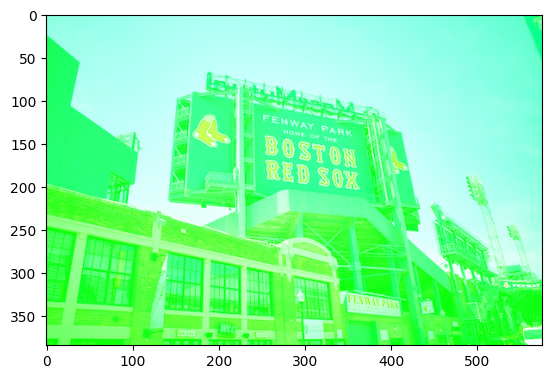

In [74]:
# サンプルプログラム
# 緑の画素値だけ255にする
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
before_pixel_value = np.arange(256)
# 画素値を+255する
after_pixel_value = before_pixel_value + 255
# 画素値を0から255にする
after_pixel_value = np.clip(after_pixel_value, 0, 255)
# 画素値を小数から整数にする
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う（Gは変更後の画素値，RとBは変更前の画素値を使用）
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], before_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], after_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], before_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()

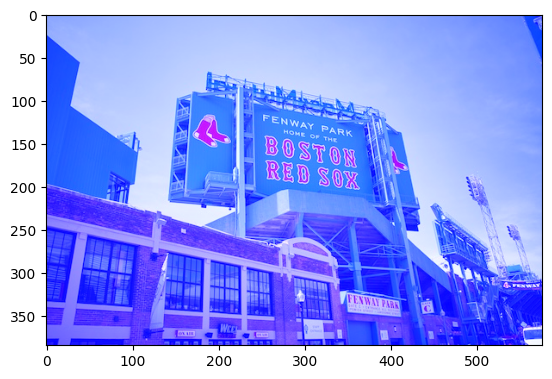

In [75]:
# サンプルプログラム
# 青の画素値だけ255にする
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# ルックアップテーブルを作成する
before_pixel_value = np.arange(256)
# 画素値を+255する
after_pixel_value = before_pixel_value + 255
# 画素値を0から255にする
after_pixel_value = np.clip(after_pixel_value, 0, 255)
# 画素値を小数から整数にする
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う（Bは変更後の画素値，RとGは変更前の画素値を使用）
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], before_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], before_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()

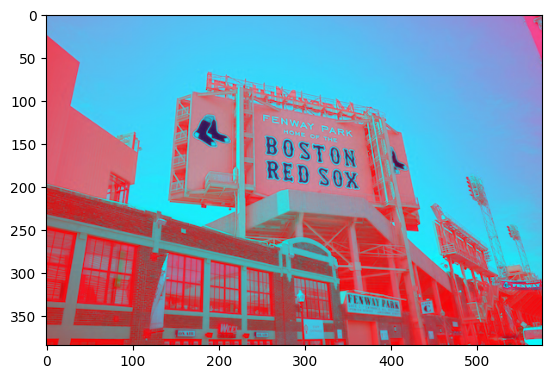

In [79]:
# Rだけネガポジ変換
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
# ネガポジ変換
before_pixel_value = np.arange(256) # 変換前
after_pixel_value = 255 - before_pixel_value # 変換後
after_pixel_value = after_pixel_value.astype(np.uint8)

# 画像変換を行う（Rは変更後の画素値，GとBは変更前の画素値を使用）
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], after_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], before_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], before_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()

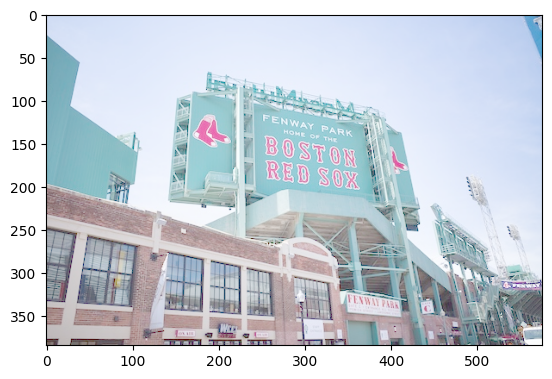

In [80]:
# RGBすべてにガンマ変換
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
gamma = 3.0
before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value / 255) ** (1 / gamma)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 各画素に画像変換を行う
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], after_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], after_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()

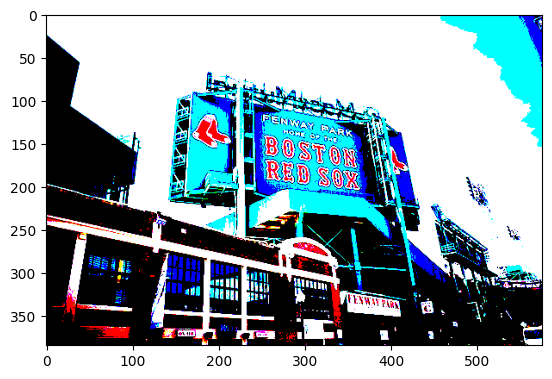

In [90]:
# RGBすべてにポスタリゼーション
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
level = 2 # 2段階
before_pixel_value = np.arange(256)
after_pixel_value = before_pixel_value // (256 / level) * 255 / (level - 1)
after_pixel_value = after_pixel_value.astype(np.uint8)

# 各画素に画像変換を行う
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], after_pixel_value)
after_image[:, :, 1] = cv2.LUT(image[:, :, 1], after_pixel_value)
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()

# RGBの各画素が2通りなので，8色で描画する（2^3=8なので）

### 演習
- iTossにあるsoya.jpegに対して，ルックアップテーブルを作成し，以下の画像変換を行いなさい
    - A. グレースケール画像に対して
        1. 明度調整（$a = 2$, $b = 50$）
        2. コントラスト低減（画素値を0から20にする）
        3. ソラリゼーション
    - B. カラー画像に対して
        1. Rの画素値をすべて0にする
        2. RとGの画素値をすべて0にする
        3. Bの画素値に対してガンマ変換（γ = 1.5）